# Lesson 2 General Notes
* After ML training, you end up with a normal program that transforms inputs into outputs.
* Classification model predicts class/category. Regression predicts a numeric quantity. Regression does not necessarily refer to *linear regression*.
*  `valid_pct=0.2` defines 20% as the validation set, which helps us to diagnose **overfitting**.
* learner object helps us to find the parameters that best match the architecture to the labels in the data.
  * `learn = cnn_learner(dls, resnet34, metrics=error_rate)`
  * resnet34: name of architecture good for image classification.
  * `metrics=error_rate`: what to print after each epoch (looking at every image in the dataset once). Metric measures quality of model's prediction using validation set. Loss is not necessarily the same as the metric. You need a loss function where if I change the parameter slightly, we can see if the loss gets better/worse; unfortunately, accuracy/error_rate doesn't give us this. Metric is what we care about while the loss is what the model uses to assess its performance.
* Overfitting is an important and challenging issue. It results from the model cheating by memorizing results and not generalizing from our dataset.
  * [Question] Is overfitting detected as training loss < validation loss? This could be true, but there could be cases where the validation loss gets worse but the validation accuracy improves. In short, we should focus on validation metric getting worse, not the loss function getting worse.
* However, just having a validation set doesn't mean that we can't cheat. We can overfit to the validation set by looking at its results and selectively changing the model to improve validation metric. We should set aside the test set that is not used for training or metrics. It is only used once all training is completed.
* Pulling out validation and test sets can be subtle. For example, we cannot randomly remove points from a time series dataset. In this case, you want to chop off the end of the time series for the validation/test set.
* `learn.fine_tune()` does transfer learning - using a pretrained model for a task different to what it was originally trained for. Important for less compute and data and getting better accuracy.
* [question] what is difference between loss, error, and metric?
  * Model to predict how old a cat or dog is. Metric could be how many years were you off by?
  * Model to predict cat vs. dog. Metric could be what percentage of the time am I wrong? This metric is called the error rate. Error is one particular metric.
  * Loss is what ML model uses to assess its performance  to improve the model by updating the weights/parameters. It tracks closely the metric you care about.
* Fine tuning: transfer learning technique where parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.
  1. Use one *epoch* to fit just those parts of the model necessary to get the new random *head* to work correctly with your dataset
  2. Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which generally don't require as many changes from the pretrained weights)
* Why does transfer learning work so well? Zeiler and Fergus visualized CNN layers.
  * First layer could find diagonal lines, gradients, green patches of color, etc. These filters are very general.
  * Second layer combines features from the first layer to find circles, edges, corners, repeating curving patterns, semicircles, etc.
  * Third layer combines features from the second layer. It can find text, repeating geometric patterns, etc.
  * Fourth layer can find dog faces.
  * In each layer, we get multiplicately complex features. When using transfer learning, we can use pre-learned features for our specific task.
* CV techniques are not just for recognizing photos.
  * Sounds can be turned into pictures by representing their features over time.
  * Anti-fraud detection.
  * Looking at different viruses and turning them into pictures.
* Useful terms and what they mean (from the book)
  * label: data we are trying to predict, such as "dog" or "cat"
  * architecture: The *template* of the mode we're trying to fit; the mathematical function we're passing the input data and parameters to
  * model: architecture + parameters
  * parameters: values in the model that change what task it can do and are updted through model training
  * fit: Update parameters of the model s.t. predictions of the model using the input data match the target labels
  * train: Synonym for *fit*
  * pretrained model: Model already trained (typically using a large dataset) and will be fine-tuned
  * fine tune: Update a pretrained model for a different task
  * epoch: One complete pass through the input data
  * loss: Measure of how good the model is, chosen to drive training via stochastic gradient descent
  * metric: Measurement of how good the model is, using validation set, chosen for human consumption
  * validation set: Dataset held out from training set to measure how good the model is
  * training set: Dataset used for fitting the model; it does not include data from the validation (or test) set(s)
  * overfitting: Training a model that *remembers* specific features of the input data rather than generalizing to unseen data
  * CNN: Convolutional neural network; type of neural work that works well for computer vision
* It is important to look at the questionnaire.
* Further research section are fun and interesting in the beginning. It requires additional work/research beyond reading the chapter.
* For future chapters (2+), rewrite notebooks from scratch on a new dataset. Through lots of practice and failure does one gain the intuition to train a model.
* [Question]: Are filters independent? Will pre-trained models fine-tuned get less good at predicting original images that they were trained on?
  * If you start with ImageNet model and finetune on dogs vs. cats and get something good, it may not be good as ImageNet model after that.
  * This is catastrophic forgetting.
  * If you want something good at the new task and previous task, you need to put in examples from the previous task in your training as well.
* [Question] What are differences between parameters and hyperparameters?
  * Parameters are the numbers which change what the model/architecture does.
  * Hyperparameters are the choices about the fitting process.
* Whole book will cover 2-3 courses (14-21 lessons).
  * Second part of the course covers putting things into production. What are capabilities and limitations of deep learning. What makes sense to put into production.
  * In first 2-3 lessons/chapters are designed for everyone.
  * Book/course covers vision, text, tabular, and recsys.
  * DL good for tabular when there is high cardinality.
  * DL in text is good for classification but bad for conversation.
  * For recommendation systems and collaborative filtering, DL used for predictions but not recommendations.
  * DL good for multi-modal data. For example, image captioning is pretty good.
  * Other: can be creative. For example, ULMFit is also fantastic for protein analysis.
* [Question] What other pre-trained models can we use? Only ImageNet or others?
  * Search: model zoo deep learning
  * Search: pretrained models deep learning
  * Most pretrained models are still focused on ImageNet and similar datasets.
* This course will involve learning how to read papers.
* How to decide if there is a relationship?
  * Pick a "null hypothesis": e.g., no relationship
  * Gather data of independent and dependent variables
  * What % of the time do we see relationship by chance?
  * A p-value is the probability of an observed (or more extreme) result assuming that the null hypothesis is true.
  * There are problems with p-values. However, multivariate models allow us to be more confident. 


In [ ]:
!pip install fastai --upgrade
!pip install nbdev
!pip install azure-cognitiveservices-search-imagesearch

     |████████████████████████████████| 358kB 4.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 92kB 6.5MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 2.7MB 14.3MB/s 


In [ ]:
from utils import *
from fastai.vision.widgets import *
from bing_api_key import key_1 # import API key, keep hidden

In [ ]:
key = key_1

In [ ]:
search_images_bing

<function utils.search_images_bing>

In [ ]:
results = search_images_bing(key, "grizzly bear")
ims = results.attrgot("content_url")
len(ims)

150

In [ ]:
dest = "images/grizzly.jpg"
download_url(ims[0], dest)

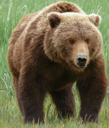

In [ ]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [ ]:
bear_types = "grizzly", "black", "teddy"
path = Path('bears')

In [ ]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path) #fastai function that returns file paths
fns

(#435) [Path('bears/teddy/00000024.jpg'),Path('bears/teddy/00000031.jpg'),Path('bears/teddy/00000071.jpg'),Path('bears/teddy/00000029.jpg'),Path('bears/teddy/00000025.jpg'),Path('bears/teddy/00000065.jpeg'),Path('bears/teddy/00000080.jpg'),Path('bears/teddy/00000136.jpg'),Path('bears/teddy/00000033.jpg'),Path('bears/teddy/00000127.jpg')...]

In [ ]:
failed = verify_images(fns) # check that all file names are images
failed

(#14) [Path('bears/teddy/00000147.jpg'),Path('bears/teddy/00000030.jpg'),Path('bears/teddy/00000107.jpg'),Path('bears/teddy/00000138.jpg'),Path('bears/teddy/00000059.jpg'),Path('bears/teddy/00000095.jpeg'),Path('bears/black/00000077.jpg'),Path('bears/black/00000036.jpg'),Path('bears/grizzly/00000031.jpg'),Path('bears/grizzly/00000136.jpg')...]

In [ ]:
# Remove files that failed verification
failed.map(Path.unlink)

(#14) [None,None,None,None,None,None,None,None,None,None...]

## From data to DataLoaders

* We need to tell fastai what kind of data we have and how it is structured.
* In Lesson 1, we used factory methods. However, we can have more flexibility with the DataBlock API.
* DataBlock API
  * `blocks=(ImageBlock, CategoryBlock)`: tell fastai what your independent variable is (`ImageBlock`) and what your dependent variable is (`CategoryBlock`)
  * `get_items=get_image_files`: how do you get a list of all filenames. What function to use to get this list of items.
  * `splitter`: We use `RandomSplitter` with 30% in validation set and set `seed` to ensure validation set is same everytime we run this.
  * `get_y`: `parent_label` is a function that looks for each item at the name of the parent. For example, with the path 'bears/teddy/00000024.jpg', the parent is `teddy`. This is the most common way of image datasets to be represented.
  * `item_tfms`: Item transforms; functions that get applied to each image. They will be resized to 128 x 128.
  * `DataLoader` grabs images by batches (default=64) and passes it on to the GPU. Before we create DataLoader, we use the splitter.
* a

In [ ]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

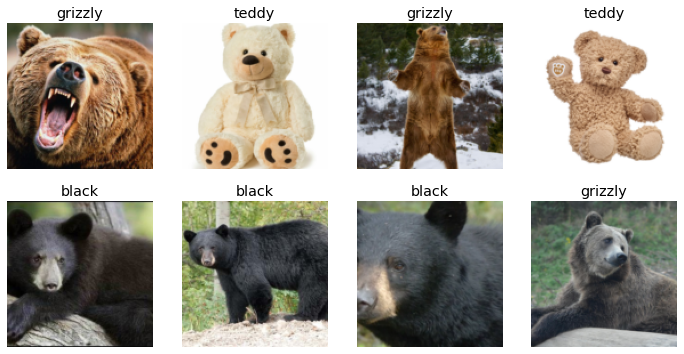

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

## Training your model, and using it to clean your data

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.712111,0.921375,0.285714,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.419130,0.168814,0.023810,00:14
1,0.271570,0.151452,0.015873,00:13
2,0.189802,0.161046,0.015873,00:14
3,0.142951,0.145380,0.015873,00:14


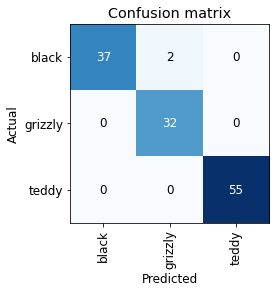

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

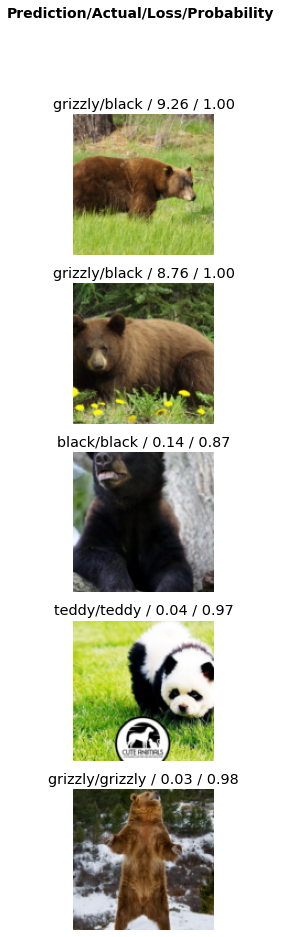

In [ ]:
interp.plot_top_losses(5, nrows=5)

## Using the model for inference

In [ ]:
# Creates new file `export.pkl` with architecture/parameters
# This can be copied to a server
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# Load model from pickle
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([2.0862e-05, 9.9992e-01, 6.0344e-05]))

In [ ]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

## Next Week
* We will create GUI for our bear classifier
* We will show how to run it for free on a service called Binder